In [1]:
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import midas.file_reader
import cygno as cy
from tqdm import tqdm

In [2]:
mfile = cy.open_mid(run=84604, path = '/tmp/',
                    tag = 'LNGS', cloud = True, verbose=True)

https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/LNGS/run84604.mid.gz
https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/LNGS/run84604.mid.gz


file /tmp/run84604.mid.gz cached

In [3]:
# Show the first N = PICMAX pictures
PICMAX = 5

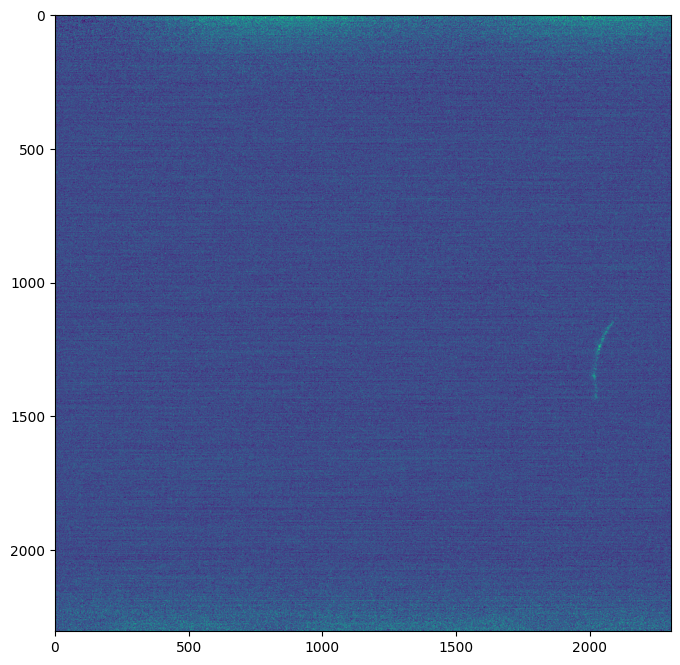

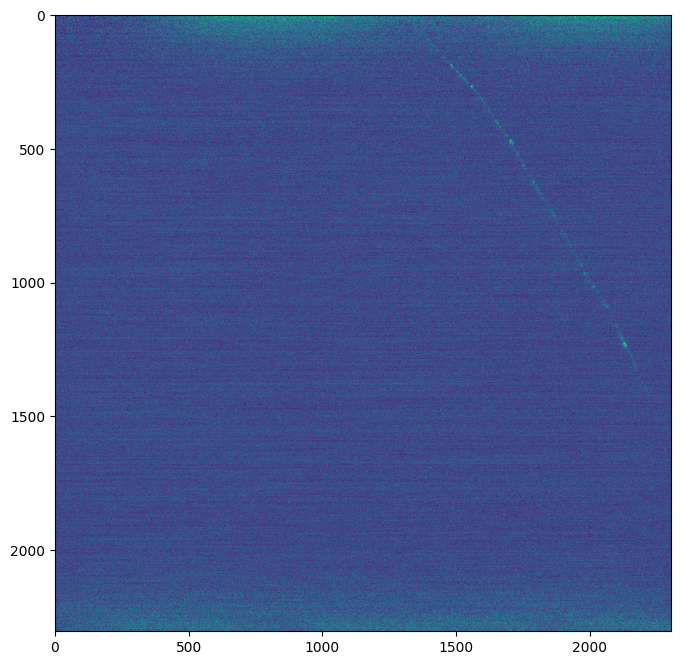

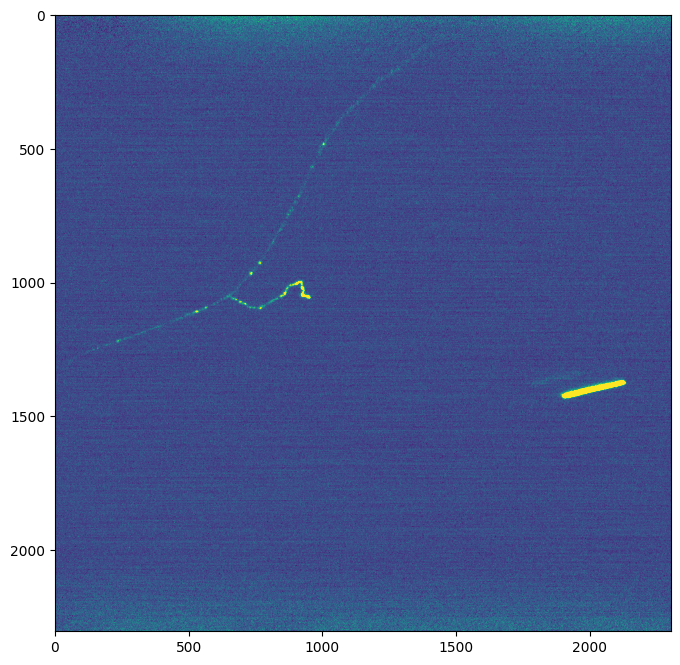

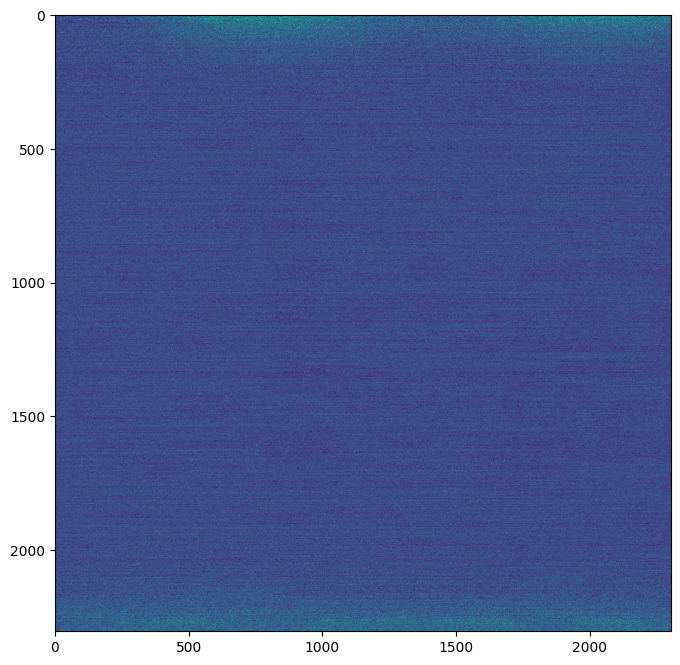

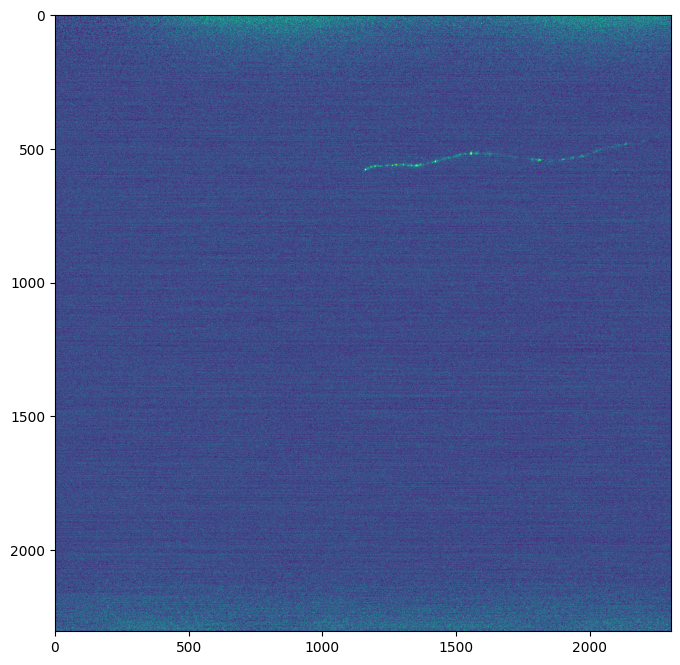

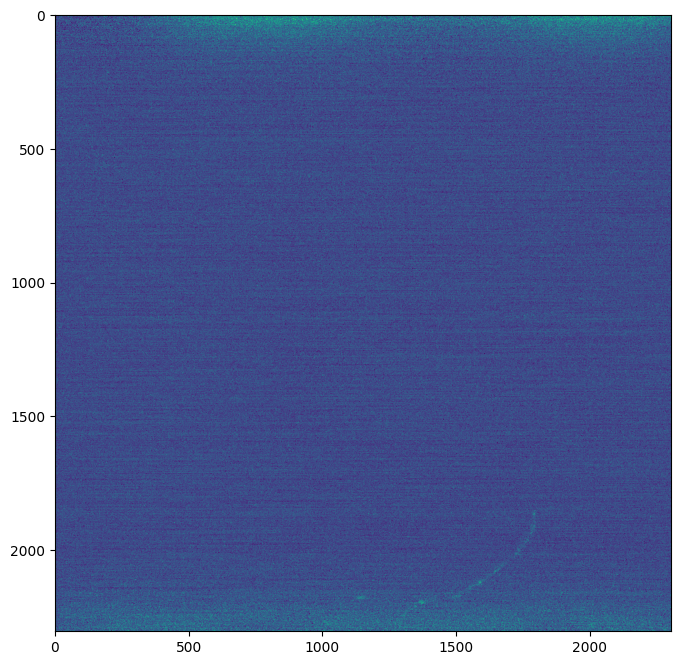

In [4]:
counter = 0
mfile.jump_to_start()
for event in mfile:
    if counter > PICMAX:
        break
    if event.header.is_midas_internal_event():
        continue

    for bank_name, bank in event.banks.items():
        if bank_name == "CAM0":
            image, _, _ = cy.daq_cam2array(bank) # The image object
            
            plt.figure(figsize=(8,8))
            plt.imshow(image, vmin=95, vmax=120)
            plt.show()
            counter += 1
        

In [5]:
image.shape

(2304, 2304)